# Zomato Market Sales Analysis 

# Zomato Market Sales Analysis 

In [1]:
## Importing required labraries - 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## importing the required file from system 
data = pd.read_csv("D:/Top Mentor/Projects/Zomato Python Base/Zomato data .csv")
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [8]:
## First copy our required data
df = data.copy()
df.head(2)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet


In [4]:
#The dataset contains the following columns:

#name: Name of the restaurant.
#online_order: Whether the restaurant accepts online orders (Yes/No).
#book_table: Whether the restaurant allows table booking (Yes/No).
#rate: The rating of the restaurant (e.g., 4.1/5).
#votes: Number of votes the restaurant has received.
#approx_cost(for two people): Approximate cost for two people.
#listed_in(type): Type of the restaurant (e.g., Buffet, Cafe, etc.).

In [14]:
# We are renaming the column name for easy understanding 
df.rename(columns = {'name' : 'Resturant Name' , 'rate': 'Rating' , 'listed_in(type)':'Type of Rest' , 'approx_cost(for two people)':'Cost of Two People'}, inplace = True)

In [15]:
df.head(2)

,Resturant Name,online_order,book_table,Rating,votes,Cost of Two People,Type of Rest
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet


In [17]:
## Reading the data first - 

In [37]:
print('No of Unique Resturant - ',df['Resturant Name'].nunique())
print('No of Unique Type of Rest - ',df['Type of Rest'].nunique())
print('shape of Data - ' , df.shape)
print('Length of Data - ',len(df))
print('No of COlumns -' , df.columns)
print('Types od Datatypes -',df.dtypes)
print('Data Information -',df.info)

No of Unique Resturant -  145
No of Unique Type of Rest -  4
shape of Data -  (148, 7)
Length of Data -  148
No of COlumns - Index(['Resturant Name', 'online_order', 'book_table', 'Rating', 'votes',
       'Cost of Two People', 'Type of Rest'],
      dtype='object')
Types od Datatypes - Resturant Name         object
online_order           object
book_table             object
Rating                float64
votes                   int64
Cost of Two People      int64
Type of Rest           object
dtype: object
Data Information - <bound method DataFrame.info of             Resturant Name online_order book_table  Rating  votes  \
0                    Jalsa          Yes        Yes     4.1    775   
1           Spice Elephant          Yes         No     4.1    787   
2          San Churro Cafe          Yes         No     3.8    918   
3    Addhuri Udupi Bhojana           No         No     3.7     88   
4            Grand Village           No         No     3.8    166   
..                     

In [27]:
# Count of Missing Value 
df.isnull().sum() 

Resturant Name        0
online_order          0
book_table            0
Rating                0
votes                 0
Cost of Two People    0
Type of Rest          0
dtype: int64

In [ ]:
# No Missing Value Found in Our Data 

In [ ]:
# in the data Rating column will creating the issue while we doing to the Analysis so we convert it into the proper way such a that removing the denominator

In [33]:
# Clean the `rate` column
df['Rating'] = df['Rating'].str.split('/').str[0].replace(['NEW', '-'], None).astype(float)

In [72]:
df.head(2) # Now Cleaning done in the rating column 

,Resturant Name,online_order,book_table,Rating,votes,Cost of Two People,Type of Rest
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet


## Now we have  some question on this data we conclude one by one question - 
1) What type of restaurant do the majority of customers order from?
2) How many votes has each type of restaurant received from customers?
3) What are the ratings that the majority of restaurants have received?
4)Zomato has observed that most couples order most of their food online. What is their average spending on each order?
5) Which mode (online or offline) has received the maximum rating?
6) Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers

In [ ]:
# We to do EDA que

In [ ]:
# 1 . Question Ans - 

In [40]:
# Count the frequency of each restaurant type
type_Restaurant = df['Type of Rest'].value_counts()
print(type_Restaurant)

Type of Rest
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64


In [ ]:
# Using Graphical Way - 

Text(0.5, 0, 'Types of Restaurant')

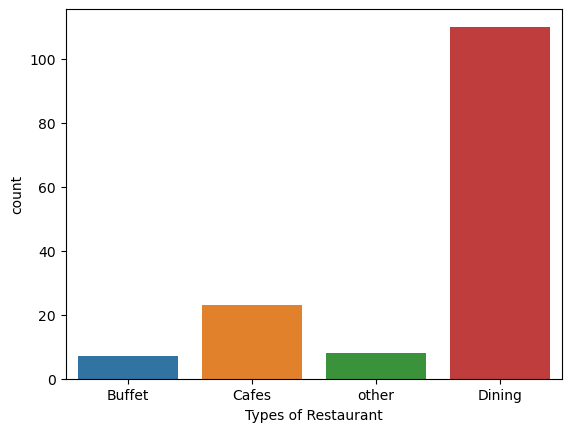

In [69]:
sns.countplot(x = df['Type of Rest'])

# Add titles and labels
plt.xlabel('Types of Restaurant')

In [52]:
# Colclusion = Majority of Restarunt Dining Catogory is very high as compare to other . 
# We conclude it normal way as well as graphical way also . 

In [ ]:
# 2 . Question Ans - 
# 2) How many votes has each type of restaurant received from customers?

In [55]:
# Group by restaurant type and sum votes
Number_Votes_Pertype = df.groupby('Type of Rest')['votes'].sum()
print('The Number of Votes Per Type Received - ',Number_Votes_Pertype)

The Number of Votes Per Type Received -  Type of Rest
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64


Text(0, 0.5, 'Total Votes')

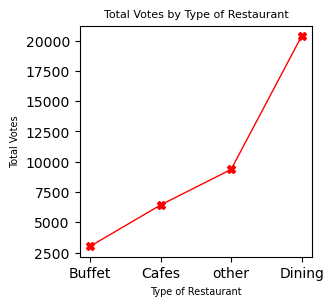

In [68]:
# Plot the data using a line chart
plt.figure(figsize=(3, 3))
Number_Votes_Pertype.sort_values().plot(kind='line', marker='X', color='red', linewidth=1)

# Add titles and labels
plt.title('Total Votes by Type of Restaurant', fontsize=8)
plt.xlabel('Type of Restaurant', fontsize=7)
plt.ylabel('Total Votes', fontsize=7)

In [ ]:
# Colclusion - Higher Vote Received to dining catogory 

In [ ]:
# 3 . Question Ans - 
# 3) What are the ratings that the majority of restaurants have received?

In [76]:
count_rating = df['Rating'].value_counts()
print('Count of Rating Majority - ',count_rating)

Count of Rating Majority -  Rating
3.8    20
3.7    15
3.3    14
3.4    12
4.1    11
3.6    11
4.0    10
3.9    10
4.2     8
3.1     7
3.2     7
2.9     7
3.5     6
4.6     2
2.8     2
4.4     2
3.0     2
4.3     1
2.6     1
Name: count, dtype: int64


Text(0, 0.5, 'Count')

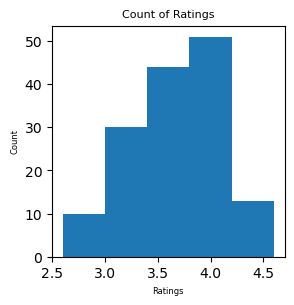

In [85]:
# Plotting the data using a Hist. chart
plt.figure(figsize=(3, 3))
plt.hist(df['Rating'],bins=5)
# Add titles and labels
plt.title('Count of Ratings', fontsize=8)
plt.xlabel('Ratings', fontsize=6)
plt.ylabel('Count', fontsize=6)

In [ ]:
# 4 . Question Ans - 
# 4)Zomato has observed that most couples order most of their food online. What is their average spending on each order?

In [87]:
# Filter for online orders and calculate average cost
avg_cost_online = df[df['online_order'] == 'Yes']['Cost of Two People'].mean()
print(f'Average spending on online orders: {avg_cost_online}')

Average spending on online orders: 510.3448275862069


<Axes: xlabel='Cost of Two People', ylabel='count'>

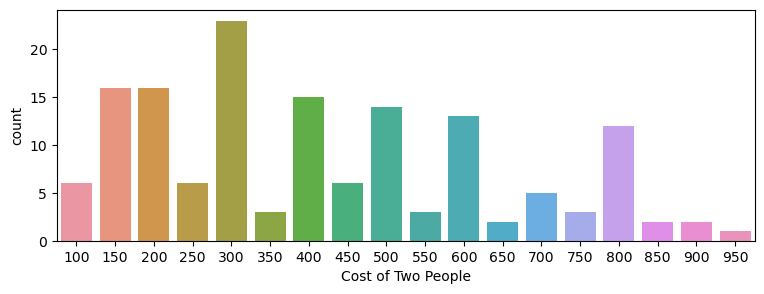

In [92]:
# Plotting the data using a Bar Graph
plt.figure(figsize=(9, 3))
avg_cost_online=df['Cost of Two People']
sns.countplot(x=avg_cost_online)

In [ ]:
# Average Spending for 1 Order by couple is approx 300rs

In [ ]:
# 5 . Question Ans - 
# 5) Which mode (online or offline) has received the maximum rating?


In [96]:
# Group by online_order and calculate average rating
rating_by_mode = df.groupby('online_order')['Rating'].mean()
print('Online & Offline Rating Average -',rating_by_mode)
# Yes Means Online & No Means Offline 

Online & Offline Rating Average - online_order
No     3.487778
Yes    3.858621
Name: Rating, dtype: float64


Text(0.5, 1.0, 'Online Offline Ratio')

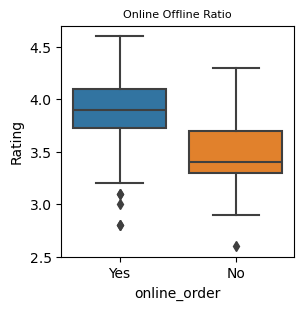

In [101]:
# Plotting the data using a Box Plot - 
plt.figure(figsize=(3, 3))
sns.boxplot( x ='online_order' , y = 'Rating', data = df)
plt.title('Online Offline Ratio', fontsize=8)

In [ ]:
# 5 . Question Ans - 
# 6) Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers

In [106]:
# Filter for offline orders and group by restaurant type
offline_orders = df[df['online_order'] == 'No']
offline_counts = offline_orders['Type of Rest'].value_counts()
print('Count of Offline Order in Rest. -',offline_counts)

Count of Offline Order in Rest. - Type of Rest
Dining    77
Cafes      8
Buffet     3
other      2
Name: count, dtype: int64


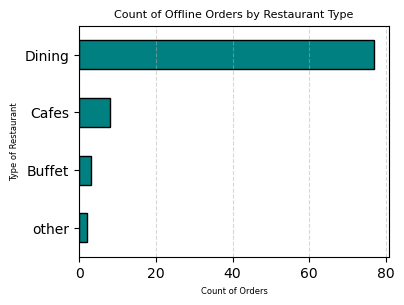

In [114]:
plt.figure(figsize=(4, 3))
offline_counts.sort_values().plot(kind='barh', color='teal', edgecolor='black')

# Add titles and labels
plt.title('Count of Offline Orders by Restaurant Type', fontsize=8)
plt.xlabel('Count of Orders', fontsize=6)
plt.ylabel('Type of Restaurant', fontsize=6)
plt.grid(axis='x', linestyle='--', alpha=0.5)